# ML Model for Available Bikes

In [1]:
#import modules needed
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('availbikes.csv', sep=',\s+', delimiter=',', skipinitialspace=True)

In [3]:
def label_enocder(data, list_cat_cols):
    '''
    Apply Label encoder to the categorical columns (list_cat_cols) in data
    
    '''
    
    #Create Label Encoder 
    for column_name in list_cat_cols:
        #Apply label encoder to each column
        data[column_name] = preprocessing.LabelEncoder().fit_transform(data[column_name])
    
    return data

In [4]:
list_le_cols=['description', 'Day', 'intervals']

In [5]:
dataBikes = label_enocder(df, list_le_cols)

In [6]:
X=dataBikes.drop(['Bikes_available'], axis=1)

In [7]:
y=dataBikes['Bikes_available']

In [8]:
#Set sizes
train_sizeX = 0.5
test_sizeX = 0.3
valid_sizeX = round((1.0 - (train_sizeX + test_sizeX)), 3)
#Combine train + valid
train_valid_size = train_sizeX + valid_sizeX
print('Training size = {}'.format(train_sizeX))
print('Validation size = {}'.format(valid_sizeX)) 
print('Test size = {}'.format(test_sizeX))

Training size = 0.5
Validation size = 0.2
Test size = 0.3


In [9]:
#Split Data
X_train_plus_valid, X_test, y_train_plus_valid, y_test \
    = train_test_split(X, y, random_state=0, \
                                    train_size = train_sizeX + valid_sizeX)

X_train, X_valid, y_train, y_valid \
    = train_test_split(X_train_plus_valid, \
                                        y_train_plus_valid, \
                                        random_state=0, \
                                        train_size = train_sizeX/train_valid_size)

In [10]:
def model_performace_val_cv(model, X, y, X_valid, y_valid):
    '''
    Compute accuracy on validation set and using cross-validation
    
    Parameters:
    model, X, y, X_valid, y_valid

    
    '''
    print('Model = {}'.format(model))
    
    #1. Test on validation set
    
    #Predictions for the test data
    y_pred = model.predict(X_valid)
    
    #Validation accuracy
    validation_accuracy = metrics.accuracy_score(y_valid, y_pred)
    print("Validation Accuracy: " + str(validation_accuracy))
    
    #2. Cross validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    print("Cross Validation (CV) accuracies: {}".format(cv_scores)) 
    print("Mean CV accuracy: {}".format(cv_scores.mean())) 
    print("Std CV accuracy: {}".format(cv_scores.std()))

In [11]:
#Model
random_forest_classifier = RandomForestClassifier()
#Fit to data
random_forest_classifier.fit(X_train, y_train)
#Assess performance using validation set and cross validation
model_performace_val_cv(random_forest_classifier, X, y, X_valid, y_valid)

Model = RandomForestClassifier()
Validation Accuracy: 0.9805002689618074
Cross Validation (CV) accuracies: [0.79881657 0.8154922  0.8004035  0.63887021 0.75265636]
Mean CV accuracy: 0.7612477657358936
Std CV accuracy: 0.0647103140385271


In [12]:
y_predicted = random_forest_classifier.predict(X_test)

In [13]:
X_test

,number,available_bikes,available_bikes_stands,intervals,description,temp,temp_min,temp_max,humidity,Day
31117,27,0,20,235,0,8,8,9,76,1
28210,40,6,15,211,0,8,7,10,76,3
26879,19,9,21,202,5,9,8,10,66,3
7405,38,20,20,57,0,7,6,8,93,2
36925,69,12,27,279,0,9,8,9,76,1
...,...,...,...,...,...,...,...,...,...,...
36131,96,4,26,274,0,9,8,9,76,1
16346,44,20,10,120,0,9,8,10,81,2
34625,38,23,17,263,4,9,8,9,76,1
7016,56,12,28,53,0,7,6,8,93,2


In [14]:
y_predicted#Prediction of number of bikes availabe

array([ 0,  6,  9, ..., 23, 12, 21], dtype=int64)

In [15]:
#Accuracy on the test set
test_accuracy = metrics.accuracy_score(y_test, y_predicted)
test_accuracy

0.9797382105074413

In [16]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_predicted})
df

,Actual,Predicted
31117,0,0
28210,6,6
26879,9,9
7405,20,20
36925,12,12
...,...,...
36131,4,4
16346,20,20
34625,23,23
7016,12,12


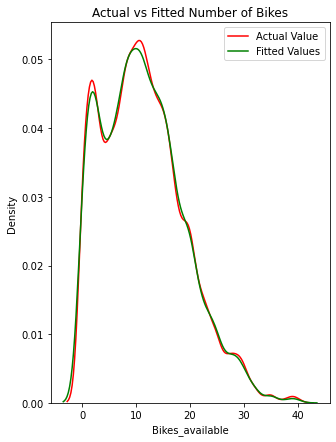

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_predicted, hist=False, color="g", label="Fitted Values" , ax=ax)
plt.legend()

plt.title('Actual vs Fitted Number of Bikes')


plt.show()
plt.close()